In [1]:
from pathlib import Path

import pyparsing as pp

mess_inp_file = Path("01_1-32_mess.inp")
spc_file = Path("species.csv")

In [2]:
from mess_io_proto import surface

surf = surface.from_mess(mess_inp_file, spc_inp=spc_file)
surf = surface.without_fake_wells(surf)
surface.display_network(surf)

In [3]:
path0 = surface.path_from_well_id_sequence(surf, [28, 0, 1, 22])
path0

[NMolWell(energy=31.6, fake=False, id=28, type='nmol', names=['C5H9(553)', 'O2(6)'], interacting=False),
 Barrier(energy=31.6, fake=False, well_ids=(0, 28), name='ts_1_32'),
 UnimolWell(energy=0.0, fake=False, id=0, type='unimol', name='S(719)'),
 Barrier(energy=33.97, fake=False, well_ids=(0, 1), name='ts_1_1'),
 UnimolWell(energy=13.53, fake=False, id=1, type='unimol', name='S(722)r0'),
 Barrier(energy=24.46, fake=False, well_ids=(1, 22), name='ts_1_17'),
 NMolWell(energy=-4.42, fake=False, id=22, type='nmol', names=['C5H8O(825)rs', 'OH(4)'], interacting=False)]

<Figure size 1000x500 with 0 Axes>

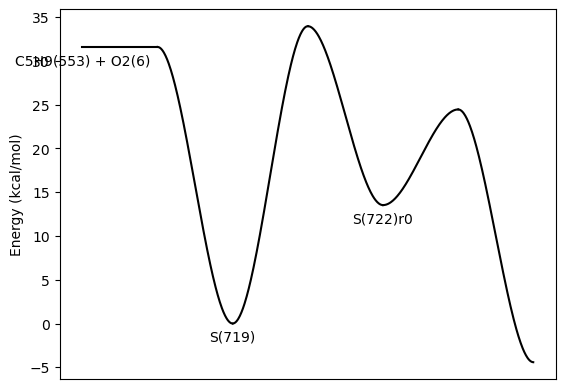

In [4]:
from importlib import reload

from matplotlib import pyplot

reload(surface)


size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()

fig = surface.plot_path(path0, fig=fig)